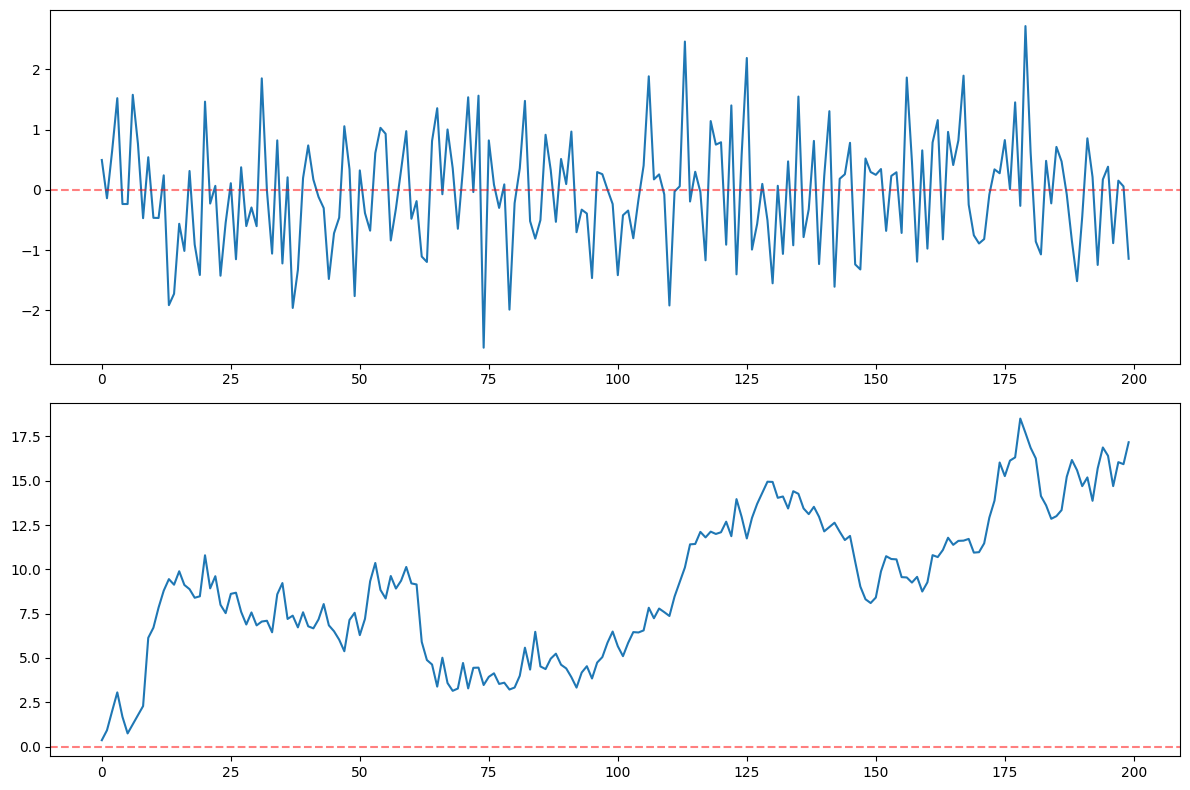

In [29]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

warnings.filterwarnings('ignore')

# Генерация данных
np.random.seed(42)
n = 200
stationary = pd.Series(np.random.normal(0, 1, n))
non_stationary = pd.Series(np.cumsum(np.random.normal(0, 1, n)))

# Визуализация
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(stationary, label='Стационарный ряд')
ax[0].axhline(0, color='r', linestyle='--', alpha=0.5)
ax[1].plot(non_stationary, label='Нестационарный ряд')
ax[1].axhline(0, color='r', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

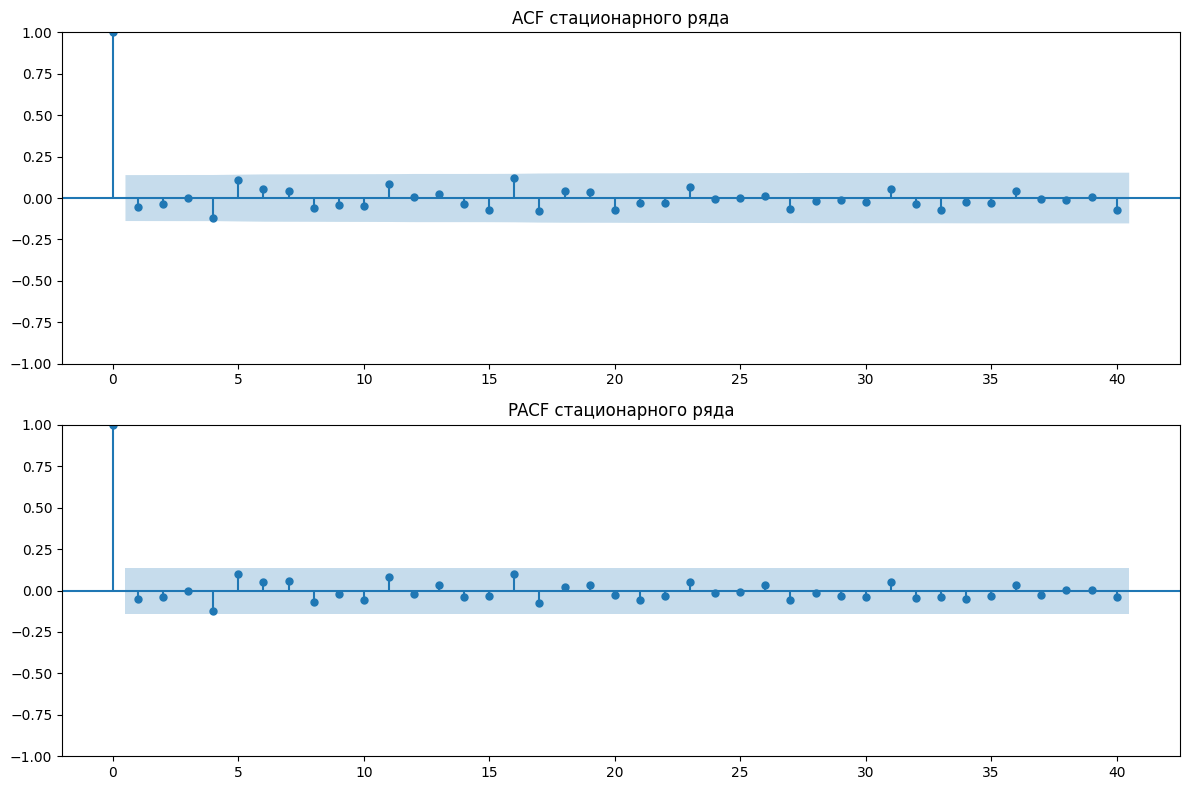

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(stationary, ax=ax[0], lags=40, title='ACF стационарного ряда')
plot_pacf(stationary, ax=ax[1], lags=40, title='PACF стационарного ряда')
plt.tight_layout()
plt.show()

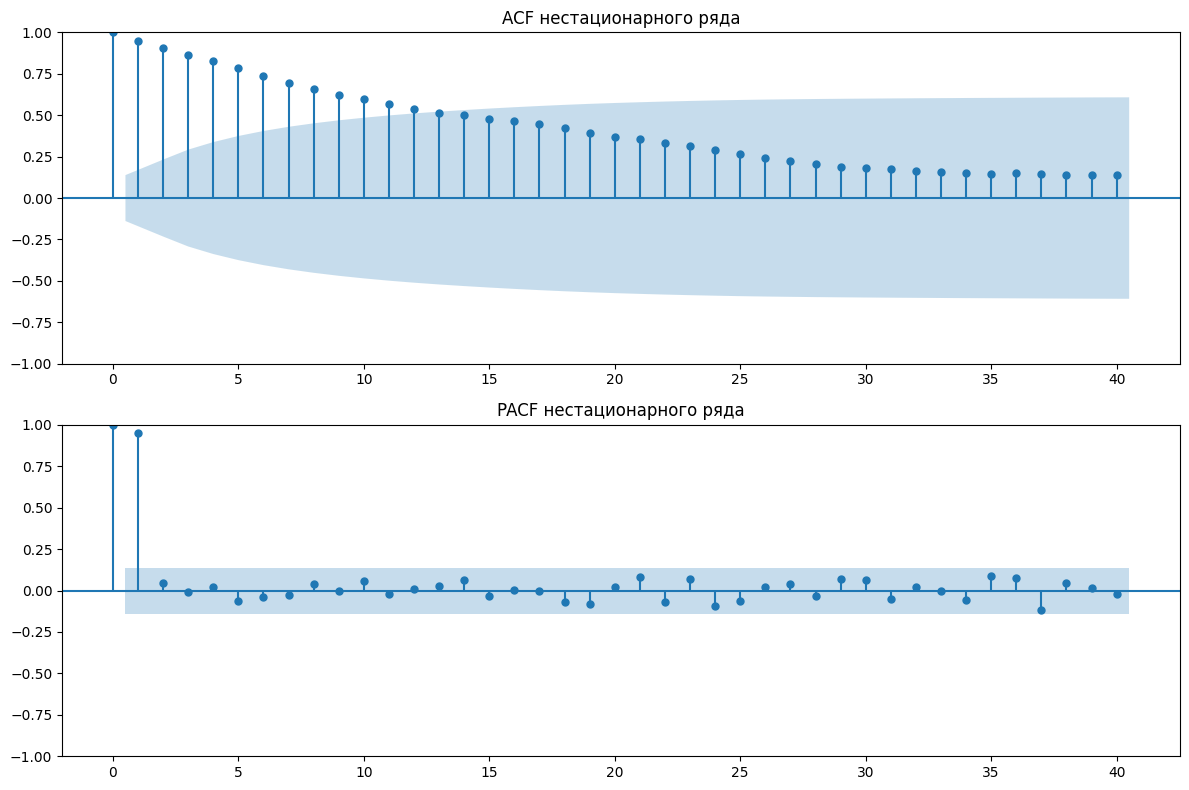

In [31]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(non_stationary, ax=ax[0], lags=40, title='ACF нестационарного ряда')
plot_pacf(non_stationary, ax=ax[1], lags=40, title='PACF нестационарного ряда')
plt.tight_layout()
plt.show()

In [32]:
from statsmodels.tsa.stattools import adfuller


def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]:.3f}')
    print(f'p-value: {result[1]:.3f}')
    print('Critical Values:')
    for k, v in result[4].items():
        print(f'  {k}: {v:.3f}')


print('Нестационарный ряд')
adf_test(non_stationary)
# Вывод: ADF Statistic: -1.820, p-value: 0.371 → Не отвергаем H0

print('Стационарный ряд')
adf_test(stationary)
# Вывод: ADF Statistic: -14.744, p-value: 0.000 → Отвергаем H0

Нестационарный ряд
ADF Statistic: -1.820
p-value: 0.371
Critical Values:
  1%: -3.464
  5%: -2.876
  10%: -2.575
Стационарный ряд
ADF Statistic: -14.744
p-value: 0.000
Critical Values:
  1%: -3.464
  5%: -2.876
  10%: -2.575


In [33]:
from statsmodels.tsa.stattools import kpss


def kpss_test(series):
    result = kpss(series)
    print(f'KPSS Statistic: {result[0]:.3f}')
    print(f'p-value: {result[1]:.3f}')
    print('Critical Values:')
    for k, v in result[3].items():
        print(f'  {k}: {v:.3f}')


print('Нестационарный ряд')
kpss_test(non_stationary)
# Вывод: KPSS Statistic: 1.316, p-value: 0.01 → Отвергаем H0

print('Стационарный ряд')
kpss_test(stationary)
# Вывод: KPSS Statistic: 0.180, p-value: 0.100 → Не отвергаем H0

Нестационарный ряд
KPSS Statistic: 1.316
p-value: 0.010
Critical Values:
  10%: 0.347
  5%: 0.463
  2.5%: 0.574
  1%: 0.739
Стационарный ряд
KPSS Statistic: 0.180
p-value: 0.100
Critical Values:
  10%: 0.347
  5%: 0.463
  2.5%: 0.574
  1%: 0.739


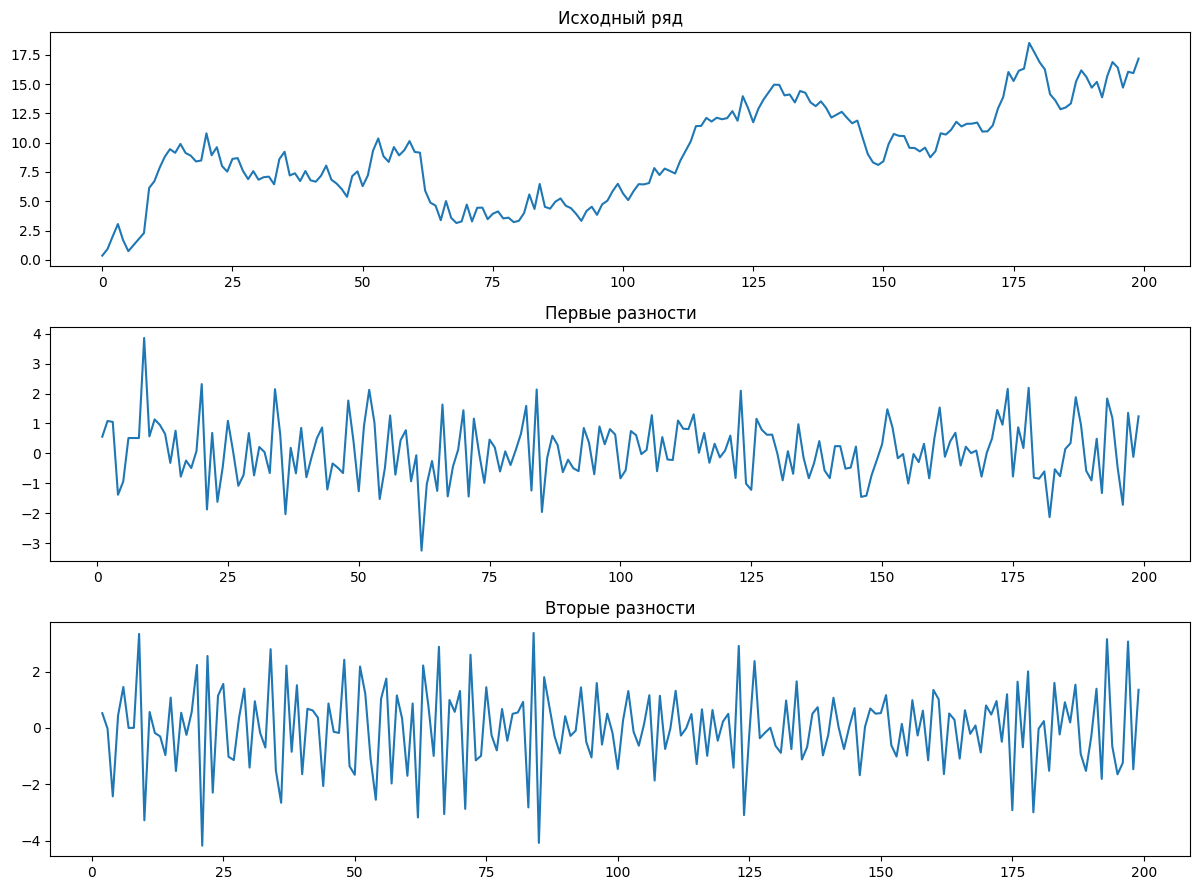

In [34]:
# Применение дифференцирования
diff_1 = non_stationary.diff().dropna()
diff_2 = diff_1.diff().dropna()

# Визуализация
fig, ax = plt.subplots(3, 1, figsize=(12, 9))
non_stationary.plot(ax=ax[0], title='Исходный ряд')
diff_1.plot(ax=ax[1], title='Первые разности')
diff_2.plot(ax=ax[2], title='Вторые разности')
plt.tight_layout()
plt.show()

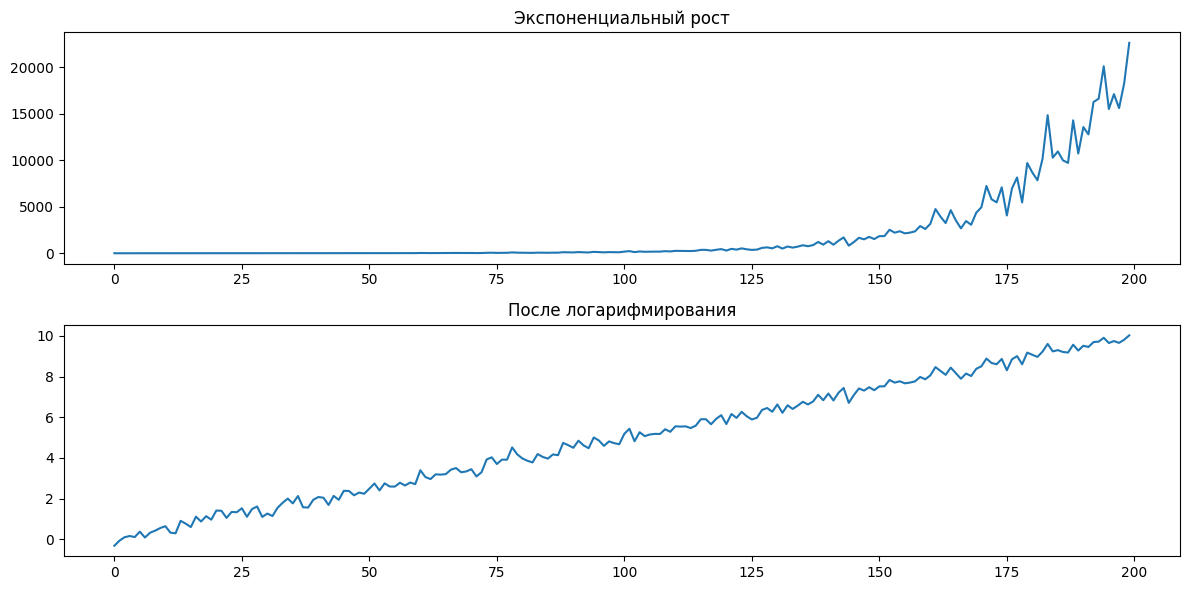

In [35]:
# Ряд с мультипликативной нестационарностью
exp_series = pd.Series(np.exp(0.05 * np.arange(n) + np.random.normal(0, 0.2, n)))

# Преобразование
log_series = np.log(exp_series)

# Визуализация
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
exp_series.plot(ax=ax[0], title='Экспоненциальный рост')
log_series.plot(ax=ax[1], title='После логарифмирования')
plt.tight_layout()
plt.show()

## Авторегрессионая модель (AR(p))

$$ y_t = c + \phi_1y_{t-1} + \phi_2y_{t-2} + ... + \phi_py_{t-p} + \epsilon_t $$

In [36]:
from statsmodels.tsa.ar_model import AutoReg

# Подбор AR(2) модели
model_ar = AutoReg(stationary, lags=2, old_names=False)
results_ar = model_ar.fit()

print(results_ar.summary())
# Коэффициенты: const=-0.0465, y.L1=-0.0539, y.L2=-0.0419

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  200
Model:                     AutoReg(2)   Log Likelihood                -266.685
Method:               Conditional MLE   S.D. of innovations              0.930
Date:                Sat, 29 Mar 2025   AIC                            541.371
Time:                        13:39:25   BIC                            554.524
Sample:                             2   HQIC                           546.694
                                  200                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0465      0.066     -0.702      0.482      -0.176       0.083
y.L1          -0.0539      0.071     -0.756      0.450      -0.194       0.086
y.L2          -0.0419      0.071     -0.588      0.5

## Модель скользяшего среднего ((MA(q))

$$ y_t = \mu + \epsilon_t + \theta_1\epsilon_{t-1} + ... + \theta_q\epsilon_{t-q} $$

In [37]:
from statsmodels.tsa.arima.model import ARIMA

# Подбор MA(1) модели
model_ma = ARIMA(stationary, order=(0, 0, 1))
results_ma = model_ma.fit()

print(results_ma.summary())
# Коэффициенты: const=-0.0406, ma.L1=-0.0564

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -268.697
Date:                Sat, 29 Mar 2025   AIC                            543.394
Time:                        13:39:26   BIC                            553.289
Sample:                             0   HQIC                           547.399
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0406      0.062     -0.652      0.515      -0.163       0.082
ma.L1         -0.0564      0.080     -0.701      0.483      -0.214       0.101
sigma2         0.8599      0.087      9.928      0.0

## ARIMA-модель

$$ y_t = c + \sum_{i=1}^p{\phi_iy_{t-i} + \epsilon_t + \sum_{j=1}^q{\theta_j\epsilon_{t-j}}} $$

In [105]:
import itertools
from tqdm import tqdm

# Поиск по сетке параметров
p_range = range(0, 3)
q_range = range(0, 3)
best_aic = np.inf
best_order = None

for p, q in tqdm(itertools.product(p_range, q_range)):
    try:
        model = ARIMA(stationary, order=(p, 0, q)).fit()
        if model.aic < best_aic:
            best_aic = model.aic
            best_order = (p, q)
    except:
        continue

print(f'Лучшая модель ARMA{best_order} с AIC={best_aic:.1f}')
# Пример вывода: ARMA(0, 0) с AIC=542.0

9it [00:00, 11.14it/s]

Лучшая модель ARMA(0, 0) с AIC=542.0


In [43]:
import yfinance as yf

# Загрузка данных Apple
data = yf.download('AAPL', start='2020-01-01', end='2023-12-31')['Close']

# # Логарифмические доходности
returns = np.log(data).diff().dropna()

[*********************100%***********************]  1 of 1 completed


In [46]:
adf_test(returns)
# ADF Statistic: -10.092, p-value: 0.000 → Стационарный

kpss_test(returns)
# KPSS Statistic: 0.110, p-value: 0.100 → Стационарный

ADF Statistic: -10.092
p-value: 0.000
Critical Values:
  1%: -3.437
  5%: -2.864
  10%: -2.568
KPSS Statistic: 0.110
p-value: 0.100
Critical Values:
  10%: 0.347
  5%: 0.463
  2.5%: 0.574
  1%: 0.739


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1005
Model:                 ARIMA(2, 0, 1)   Log Likelihood                2463.459
Date:                Sat, 29 Mar 2025   AIC                          -4916.918
Time:                        13:42:20   BIC                          -4892.354
Sample:                             0   HQIC                         -4907.584
                               - 1005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.648      0.099      -0.000       0.002
ar.L1         -1.0825      0.040    -26.838      0.000      -1.162      -1.003
ar.L2         -0.1533      0.020     -7.840      0.0

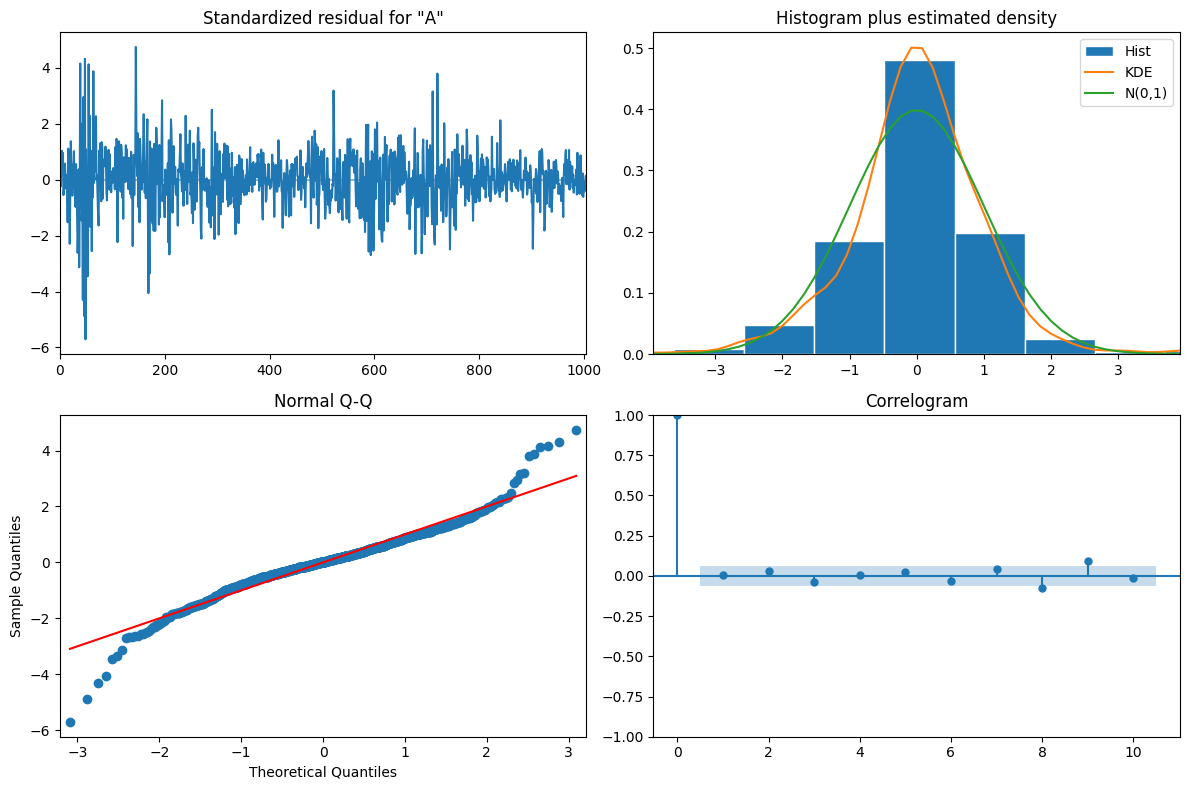

In [47]:
model_arma = ARIMA(returns, order=(2, 0, 1)).fit()
print(model_arma.summary())

# Диагностика остатков
model_arma.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

Модель ARIMA(p,d,q) объединяет:
- Авторегрессию (AR)
- Интегрирование (I) через дифференцирование порядка d
- Скользящее среднее (MA)

[*********************100%***********************]  1 of 1 completed
125it [02:16,  1.09s/it]


<Figure size 1200x600 with 0 Axes>

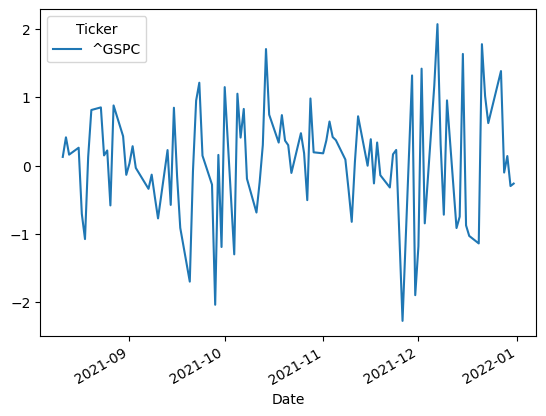

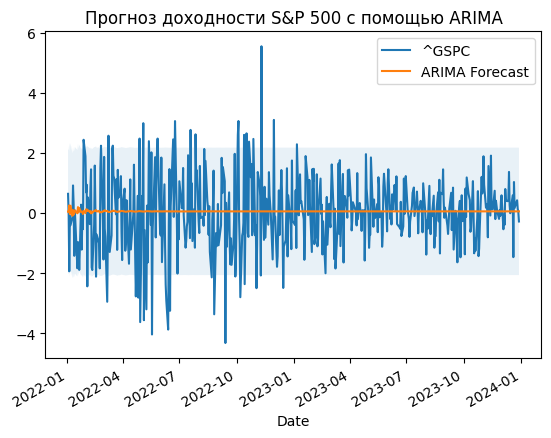

In [106]:
# Загрузка данных
data = yf.download('^GSPC', start='2010-01-01', end='2023-12-31')['Close']
returns = data.pct_change().dropna() * 100  # Процентные изменения

# Разделение на тренировочную и тестовую выборки
train = returns[:'2022-01-01']
test = returns['2022-01-01':]

p_range = range(0, 5)
d_range = range(0, 5)
q_range = range(0, 5)
best_aic = np.inf
best_order = None

# Подбор ARIMA(p, d, q)
for p, d, q in tqdm(itertools.product(p_range, d_range, q_range)):
    try:
        model = ARIMA(train, order=(p, d, q)).fit()
        if model.aic < best_aic:
            best_aic = model.aic
            best_order = (p, d, q)
    except:
        continue

model = ARIMA(train, order=best_order).fit()
forecast = model.get_forecast(steps=len(test))

# Визуализация
plt.figure(figsize=(12, 6))
train[-100:].plot(label='Train')
test.plot(label='Test')
plt.plot(test.index, forecast.predicted_mean, label='ARIMA Forecast')
plt.fill_between(test.index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1], alpha=0.1)
plt.title('Прогноз доходности S&P 500 с помощью ARIMA')
plt.legend()
plt.show()


<Figure size 1200x600 with 0 Axes>

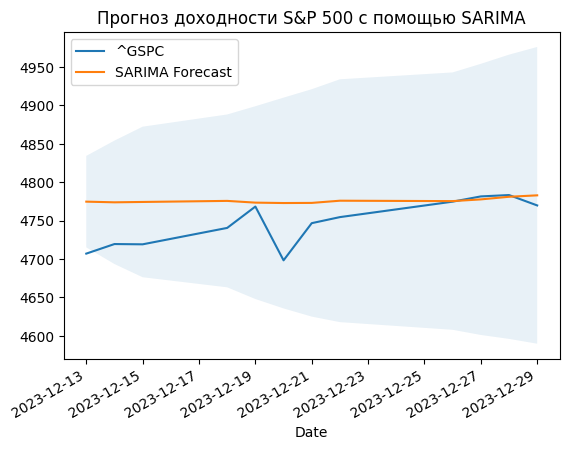

In [84]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Пример для ежемесячных продаж
model = SARIMAX(data,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False)
results = model.fit(disp=False)

# Прогноз на 12 месяцев
forecast = results.get_forecast(steps=12)

plt.figure(figsize=(12, 6))
data[-12:].plot(label='Fact')
plt.plot(data.index[-12:], forecast.predicted_mean, label='SARIMA Forecast')
plt.fill_between(data.index[-12:],
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1], alpha=0.1)
plt.title('Прогноз доходности S&P 500 с помощью SARIMA')
plt.legend()
plt.show()

In [90]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


# Создание лаговых признаков
def create_features(data, lags=5, value='value'):
    df = pd.DataFrame(data)
    for i in range(1, lags + 1):
        df[f'lag_{i}'] = df[value].shift(i)
    return df.dropna()


df = create_features(data, lags=5, value='^GSPC')
X, y = df.drop('^GSPC', axis=1), df['^GSPC']

# Обучение модели
model = XGBRegressor(n_estimators=100)
model.fit(X[:-30], y[:-30])  # Последние 30 точек для теста

# Прогноз
predictions = model.predict(X[-30:])
mse = mean_squared_error(y[-30:], predictions)
print(f'MSE: {mse:.4f}')

MSE: 1530.3400


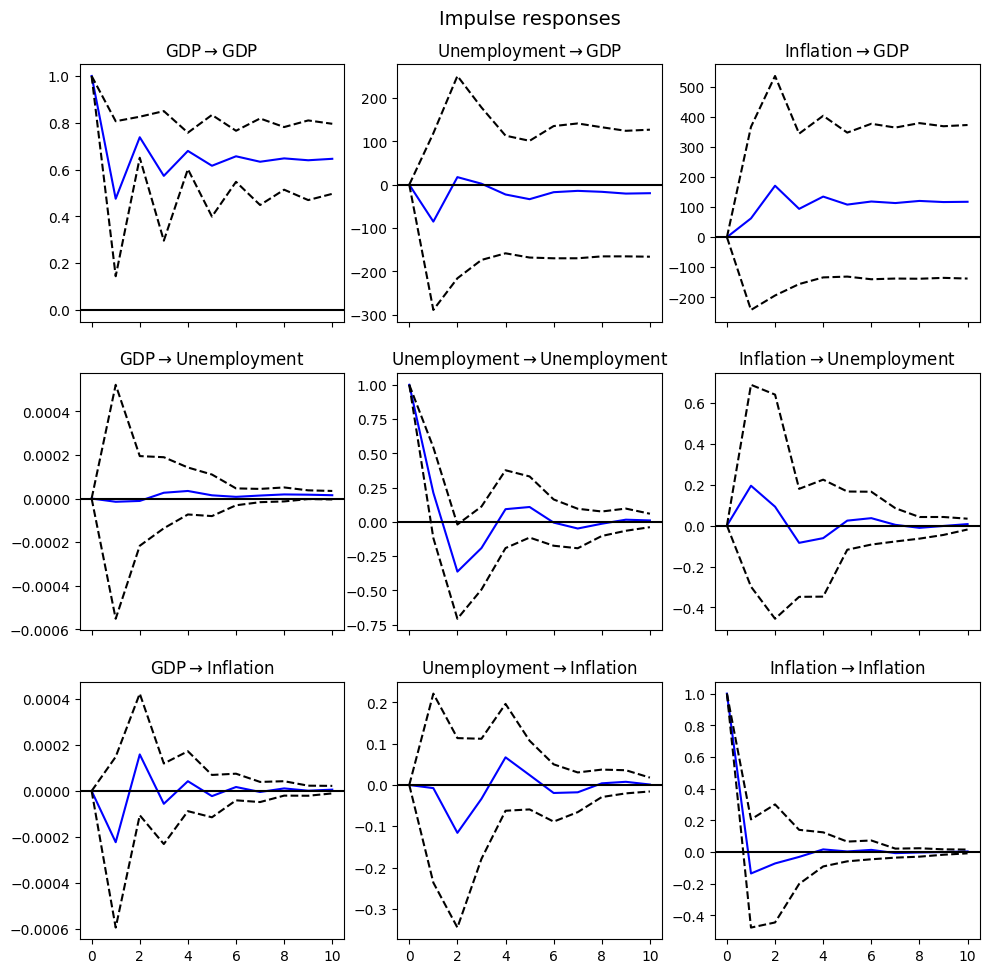

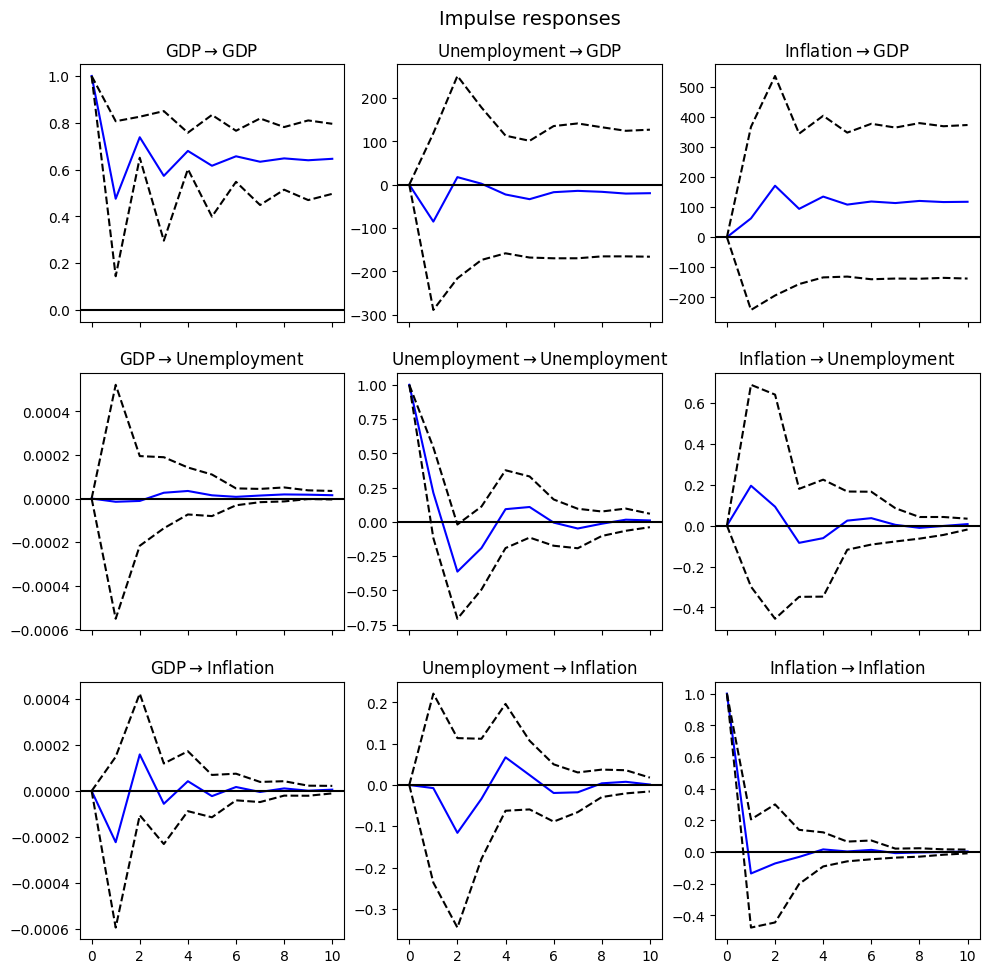

In [97]:
from statsmodels.tsa.api import VAR

# Загрузка макроэкономических показателей
data = pd.read_csv('macro_data.csv', index_col='Date', parse_dates=True)

# Подготовка данных
model = VAR(data[['GDP', 'Unemployment', 'Inflation']])
results = model.fit(maxlags=2)

# Прогноз на 5 периодов
lag_order = results.k_ar
forecast = results.forecast(data[['GDP', 'Unemployment', 'Inflation']].values[-lag_order:], 5)

# Импульсные реакции
irf = results.irf(10)
irf.plot(orth=False)

In [98]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Анализ коинтеграции между ценами акций
johansen_test = coint_johansen(data[['Stock_A', 'Stock_B']], 0, 1)
print('Собственные значения:', johansen_test.lr1)
print('Критические значения:', johansen_test.cvt)

Собственные значения: [5.96449586 0.00816776]
Критические значения: [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


In [100]:
from statsmodels.regression.linear_model import OLS

# Создание лаговых признаков для регрессии
df['GDP_lag1'] = df['GDP'].shift(1)
df['Unemployment_lag2'] = df['Unemployment'].shift(2)
df.dropna(inplace=True)

model = OLS(df['Inflation'],
            df[['GDP_lag1', 'Unemployment_lag2']]).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              Inflation   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              809.9
Date:                Sat, 29 Mar 2025   Prob (F-statistic):                    3.94e-28
Time:                        14:05:46   Log-Likelihood:                         -11.938
No. Observations:                  34   AIC:                                      27.88
Df Residuals:                      32   BIC:                                      30.93
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print(f'MAE: {mean_absolute_error(y[-30:], predictions):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y[-30:], predictions)):.2f}')
print(f'MAPE: {mape(y[-30:], predictions):.2f}%')

MAE: 30.78
RMSE: 39.12
MAPE: 0.66%


In [108]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
scores = []

for train_index, test_index in tscv.split(data):
    train = data.iloc[train_index]
    test = data.iloc[test_index]

    model = ARIMA(train, order=(1, 1, 1)).fit()
    forecast = model.forecast(steps=len(test))

    scores.append(mean_squared_error(test, forecast))

print(f'Средний RMSE: {np.mean(np.sqrt(scores)):.2f}')

Средний RMSE: 392.02


In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Преобразование данных для LSTM
def create_dataset(data, look_back=10):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

look_back = 5
data = pd.read_csv('macro_data.csv', index_col='Date', parse_dates=True)
X_train, y_train = create_dataset(data['GDP'][:29], look_back)
X_test, y_test = create_dataset(data['GDP'][29:], look_back)

# Обучение модели
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 806275584.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 806275072.0000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 806274560.0000
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 806274048.0000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 806273536.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 806273024.0000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 806272512.0000
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 806271808.0000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 806271488.0000
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 806270784.0000
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 806270272.0000
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 806269760.0000
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 806269440.0000
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/ste

In [114]:
X_train

array([[20099.3428306 , 20472.34713977, 21129.53770762, 21804.60597128,
        21953.16932506],
       [20472.34713977, 21129.53770762, 21804.60597128, 21953.16932506,
        22453.17260861],
       [21129.53770762, 21804.60597128, 21953.16932506, 22453.17260861,
        23315.8425631 ],
       [21804.60597128, 21953.16932506, 22453.17260861, 23315.8425631 ,
        23653.48694583],
       [21953.16932506, 22453.17260861, 23315.8425631 , 23653.48694583,
        23906.10512281],
       [22453.17260861, 23315.8425631 , 23653.48694583, 23906.10512281,
        24608.51200872],
       [23315.8425631 , 23653.48694583, 23906.10512281, 24608.51200872,
        24907.31646144],
       [23653.48694583, 23906.10512281, 24608.51200872, 24907.31646144,
        25406.85404929],
       [23906.10512281, 24608.51200872, 24907.31646144, 25406.85404929,
        26048.39245431],
       [24608.51200872, 24907.31646144, 25406.85404929, 26048.39245431,
        26117.34395107],
       [24907.31646144, 25406.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


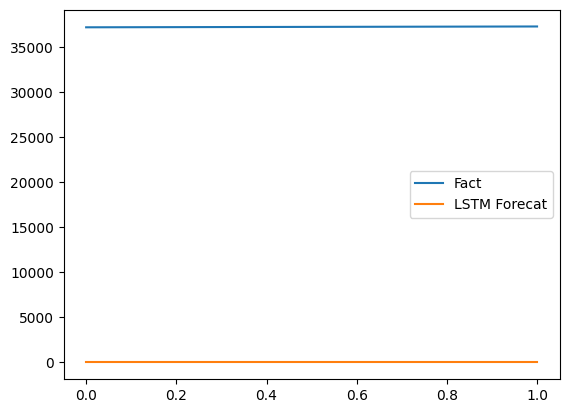

In [112]:
y_pred = model.predict(X_test)
plt.plot(y_test, label='Fact')
plt.plot(y_pred, label='LSTM Forecat')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import VotingRegressor
from statsmodels.tsa.arima.model import ARIMA

# Гибрид ARIMA и Voting
arima_forecast = ARIMA(...).predict()
ensemble_forecast = VotingRegressor(...).predict()

ensemble = 0.7 * arima_forecast + 0.3 * ensemble_forecast

In [141]:
from river import compose, linear_model, preprocessing, metrics

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    linear_model.LinearRegression()
)

metric = metrics.MAE()

y = data['GDP']
X = range(len(data))

y_preds = list()

for yt, xt in zip(y, X):
    y_pred = model.predict_one({f'{xt}' :xt})
    metric.update(yt, y_pred)
    y_preds.append(y_pred)
    model.learn_one({f'{xt}' :xt}, yt)

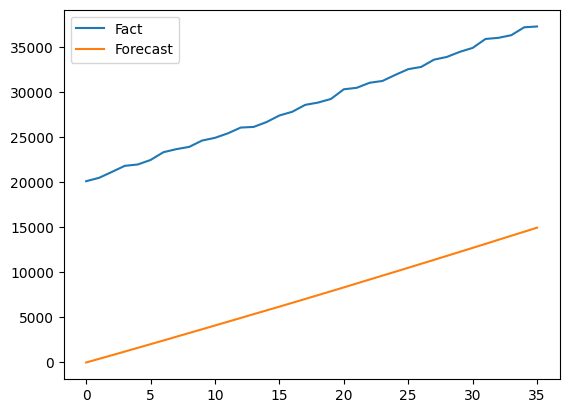

In [142]:
plt.plot(range(len(y)), y, label='Fact')
plt.plot(range(len(y)), y_preds, label='Forecast')
plt.legend()
plt.show()